# 🌳 Task 5: Decision Trees & Random Forest - Heart Disease Prediction


This notebook implements and compares **Decision Tree** and **Random Forest** classifiers using the Heart Disease dataset.

We will:
- Train and visualize a Decision Tree
- Tune tree depth to avoid overfitting
- Train a Random Forest and compare performance
- Plot feature importances
- Evaluate using Cross-Validation


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:

# Load dataset (update path as needed)
df = pd.read_csv("Heart Disease Dataset.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:

# Check for missing values
print(df.isnull().sum())

# Split into features and target
X = df.drop("target", axis=1)
y = df["target"]


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:

# Train a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict & evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



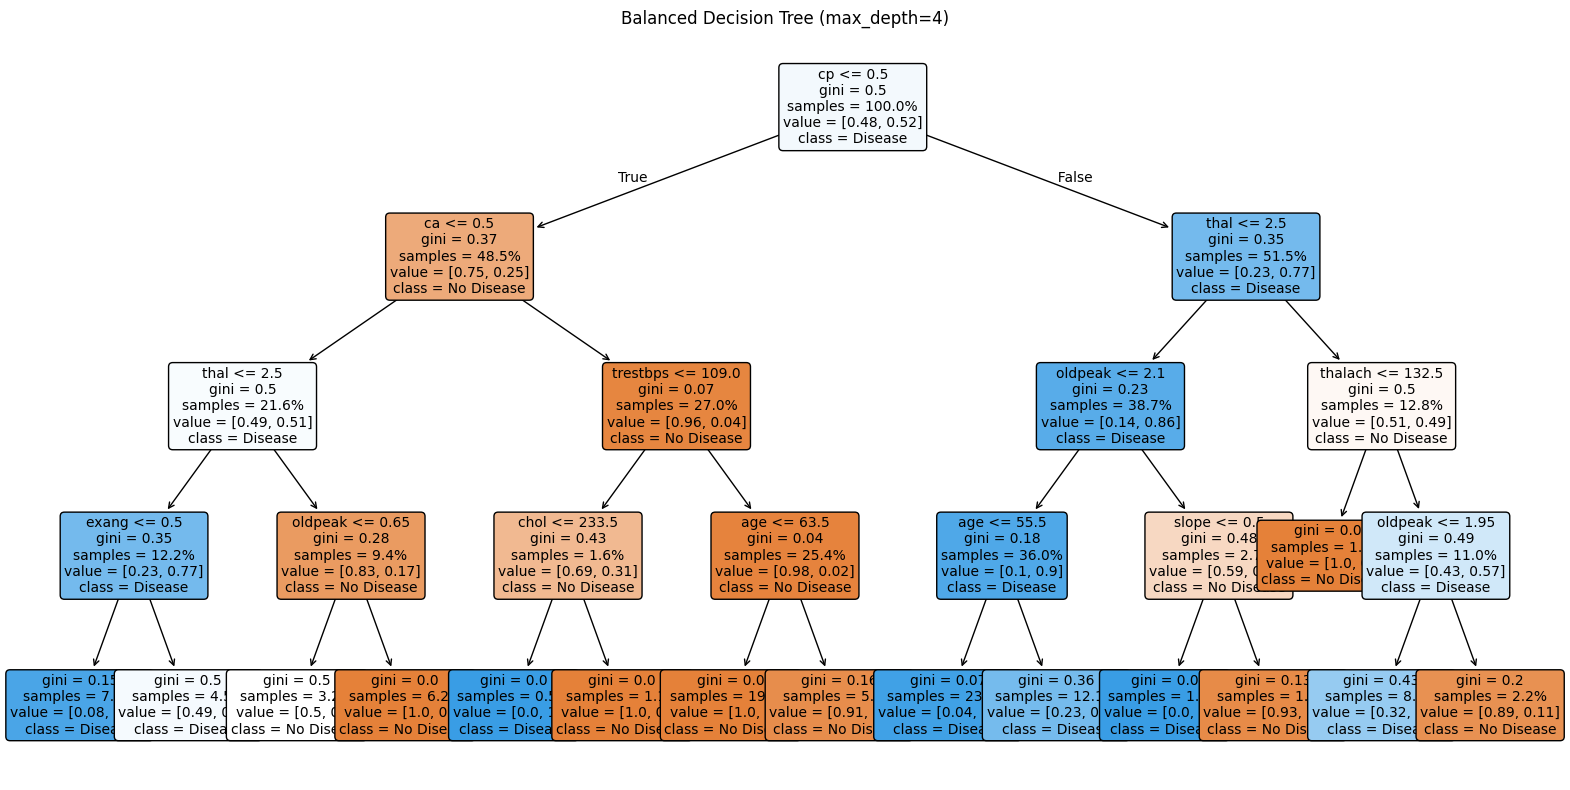

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Moderate-depth tree for detailed but clear output
dt_balanced = DecisionTreeClassifier(
    max_depth=4,               # Slightly deeper than 3
    min_samples_split=8,
    min_samples_leaf=4,
    random_state=42
)
dt_balanced.fit(X_train, y_train)

# Visualize
plt.figure(figsize=(16, 8))  # Larger width for clarity
plot_tree(
    dt_balanced,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True,
    proportion=True,
    precision=2,
    fontsize=10
)
plt.title("Balanced Decision Tree (max_depth=4)")
plt.tight_layout()
plt.savefig("balanced-decision-tree.png", dpi=300, bbox_inches="tight")
plt.show()


In [19]:
import joblib
joblib.dump(dt_balanced, "decision_tree_model.pkl")


['decision_tree_model.pkl']

In [ ]:

# Prune the tree to prevent overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))


Pruned Tree Accuracy: 0.7804878048780488


In [10]:

# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


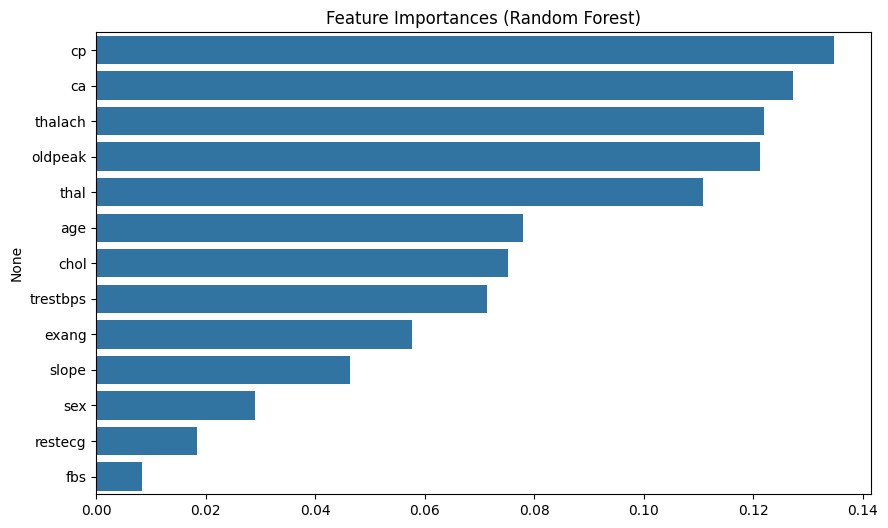

In [11]:

# Feature importances from Random Forest
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances (Random Forest)")
plt.savefig("feature-importances.png")
plt.show()


In [12]:

# Cross-validation scores
dt_score = cross_val_score(dt_pruned, X, y, cv=5).mean()
rf_score = cross_val_score(rf, X, y, cv=5).mean()

print("Decision Tree CV Score:", dt_score)
print("Random Forest CV Score:", rf_score)


Decision Tree CV Score: 0.8341463414634147
Random Forest CV Score: 0.9970731707317073



## ✅ Conclusion

- Decision Trees are interpretable but prone to overfitting
- Random Forests give better accuracy and robustness
- Feature importance highlights the most predictive features

## 🎯 Interview Questions

1. How does a decision tree work?
2. What is entropy and information gain?
3. How is a random forest better than a single tree?
4. What is overfitting and how do you prevent it?
5. What is bagging?
6. How do you visualize a decision tree?
7. How do you interpret feature importance?
8. What are the pros and cons of random forests?
